### 2 LAB 8: Regression and Logistic Regression
  - Regression
    * Linear Regression
    – Multiple Regression
  - Logistic Regression
    – Multiclass classification Logistic Regression

In [57]:
try:
  from google.colab import drive
  %tensorflow_version 2.x
  COLAB = True
  print("Note: using Google CoLab")
except:
  print("Note: not using Google CoLab")
  COLAB = False

# Print your name and Roll No.
print('Name: Rohit Byas Sherwan')
print('Roll No. :181210043')

# Print the curent time
from datetime import datetime
print("Date Time :", datetime.now())

Note: using Google CoLab
Name: Rohit Byas Sherwan
Roll No. :181210043
Date Time : 2021-02-22 09:05:52.796377


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


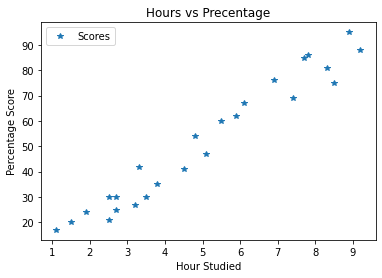

In [5]:
dataset.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Precentage')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage Score')
plt.show()

**observation**

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [6]:
# method to retrieve rows from a Data frame
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

In [56]:
?train_test_split
#Split arrays or matrices into random train and test subsets

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

**observation**

This script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

In [11]:
len(x_train),len(y_train)

(20, 20)

In [12]:
len(x_test), len(y_test)

(5, 5)

In [13]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#traning the algorithm
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
regressor.intercept_

2.018160041434662

In [17]:
regressor.coef_

array([9.91065648])

**observation**

this tell that for every one unit of change in hours studied, the change in the score is about 9.91%

In [18]:
y_pred=regressor.predict(x_test)

In [19]:
df=pd.DataFrame({'Actual':y_test, 'Predicited':y_pred})
df

,Actual,Predicited
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


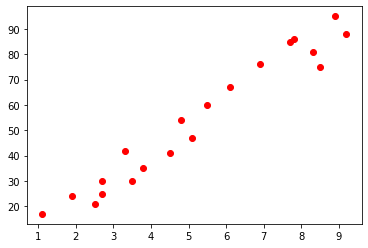

In [20]:
#to see the relationship between the training data values
plt.scatter(x_train, y_train, c='red')
plt.show()

**observation**

we can see that, though our model is not very precise, the predicted percentages are close to the actual ones.

Text(0, 0.5, 'predicted values')

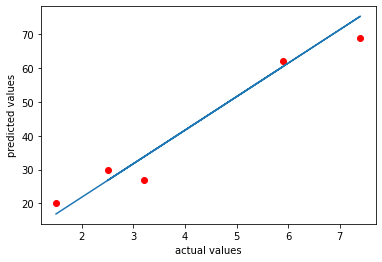

In [21]:
#to see the relationship between the predicted
#brain weight values using scattered graph
plt.plot(x_test,y_pred)
plt.scatter(x_test,y_test,c='red')
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


**observation**

we can see that Mean absolute error is less than 10%, so this model is good for prediction


### 5.2

In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('petrol_consumption.csv')
dataset.shape

(48, 5)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
dataset.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [26]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [27]:
dataset.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [28]:
# install if you are using heatmapz for the first time
!pip install heatmapz

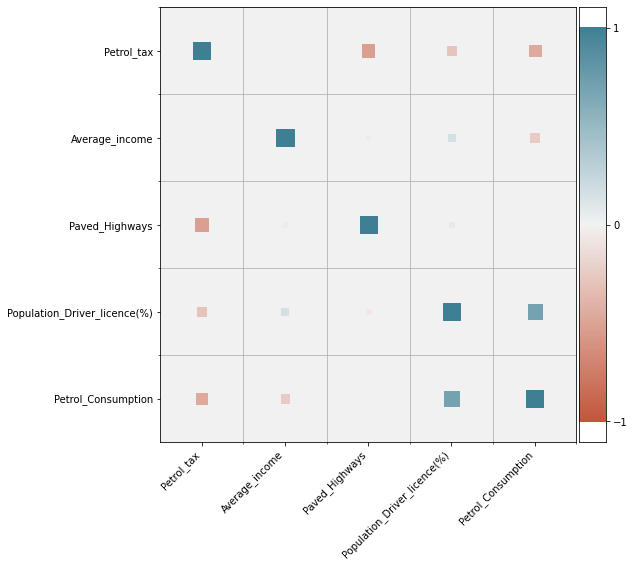

In [29]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot
plt.figure(figsize=(8, 8))
corrplot(dataset.corr(), size_scale=300);
# Blue means positive, red means negative. The stronger the color, the larger the correlation magnitude.

In [30]:
# load the data to input and output vairiable
X = dataset[['Petrol_tax', 'Average_income','Paved_Highways','Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [31]:
# Split data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33, 4), (15, 4), (33,), (15,))

In [34]:
X_train

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
2,9.00,3865,1586,0.580
46,7.00,4296,4083,0.623
18,7.00,4716,5915,0.724
15,7.00,4318,10340,0.586
28,8.00,4188,5975,0.563
22,9.00,4897,2449,0.511
16,7.00,4206,8508,0.572
41,7.00,3656,3985,0.563
20,7.00,4593,7834,0.663
42,7.00,4300,3635,0.603


In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-43.200216
Average_income,-0.067281
Paved_Highways,-0.005851
Population_Driver_licence(%),1331.115701


In [37]:
y_pred = regressor.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,468.315946
4,410,550.397078
26,577,590.639321
30,571,572.176794
32,577,649.893941
37,704,648.443789
34,487,515.198650
40,587,674.764637
7,467,503.476378
10,580,500.073610


In [39]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 49.203756556631184
Mean Squared Error: 3673.2072706922686
Root Mean Squared Error: 60.60699027911111


**observation**

The value of root mean squared error is 60.07, which is greater than 10% of the mean value, this means that our algorithm was not very accurate but can still make reasonably good predictions.

### PART 8.3: Logistic_Regression_using_Sklearn

In [40]:
# Run this cell if you are using scikit-learn for the first time
# ! pip install -U scikit-learn

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [42]:
#predict whether a person is diabetic or not
dataset= pd.read_csv('sample_dataset.csv') # Dataset of diabities

In [43]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
independent_variables=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [46]:
data= dataset[independent_variables] # Features
label= dataset.Outcome # Target variable

In [47]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [48]:
label.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [49]:
# split X and y into training and testing sets
train_data,test_data, train_label,test_label=train_test_split(data,label,test_size=0.20)

In [50]:
train_data.shape, test_data.shape, train_label.shape, test_label.shape

((614, 8), (154, 8), (614,), (154,))

In [51]:
# instantiate the model (using the default parameters)
regressor= LogisticRegression()
# fit the model with data
regressor.fit(train_data, train_label)
# predicting model's performancce on test data
predicted_test_label=regressor.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
confusion_matrix= metrics.confusion_matrix(test_label, predicted_test_label)
confusion_matrix

array([[89,  6],
       [27, 32]])

Evaluation Paramters : Confusion Matrix

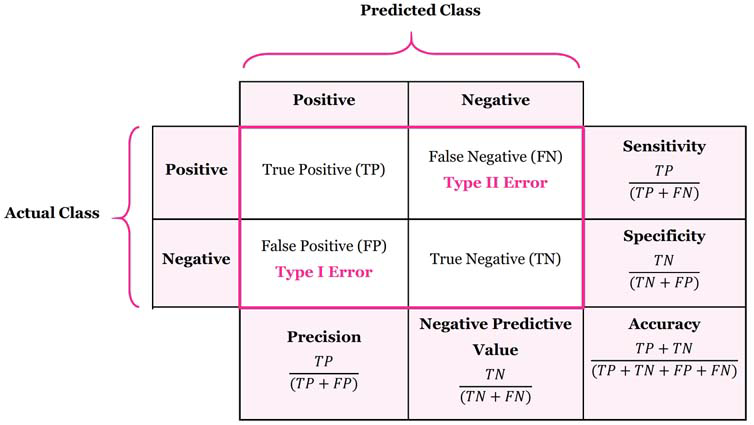

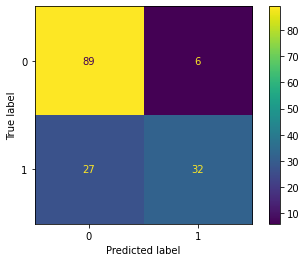

In [53]:
plot_confusion_matrix(regressor, test_data, test_label)
# TruePositive , True Negative, False Positive, False Negative

In [54]:
print("Accuracy:",metrics.accuracy_score(test_label, predicted_test_label))
print("Precision:",metrics.precision_score(test_label, predicted_test_label))
print("Recall:",metrics.recall_score(test_label, predicted_test_label))

Accuracy: 0.7857142857142857
Precision: 0.8421052631578947
Recall: 0.5423728813559322


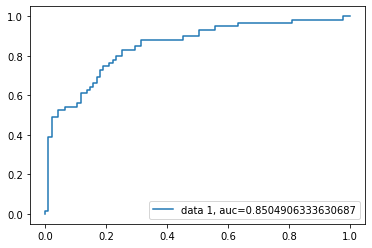

In [55]:
test_predictions= regressor.predict_proba(test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_label, test_predictions)
auc = metrics.roc_auc_score(test_label, test_predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**observation**

1.Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI

2.Blood pressure has a negative influence on the prediction i.e. higher blood pressure is correlated with a person not being diabetic.